# <center>Towards control of opinion diversity by introducing zealots into a polarised social group </center>
Code used in the paper submitted to Discovery Science 2021.

In [1]:
# imports
import sys
import numpy as np
import pickle
from time import time
import matplotlib.pyplot as plt
from matplotlib import rc
import networkx as nx
from matplotlib.lines import Line2D
import util # our functions

# for plots appearance
color = ["blue", "red", "green", "orange"]
marker = "x+*^p"
linestyle = ["--", "-.", ":", "-", (0,(3, 5, 1, 5))]

# latex rendering
rc('font',**{'family':'sans-serif','sans-serif':['Palatino']})
rc('text', usetex=True)
rc('legend', frameon=False) # PS doesn't do well with transparencies

## Figure 1.
Choose the parameters.

In [8]:
n = 50 # nb users
n1 = 10 # N1(t=0)
z0, z1 = 5, 2  # number of zealots
max_time = 20
spacing_simu = 1
length = int(np.floor(max_time/spacing_simu)+1)

Simulation.

In [9]:
N1t = util.voter_simu(n, n1, z1, z0, max_time, spacing_simu, seed)
N1t = N1t.astype(int)

Plot.

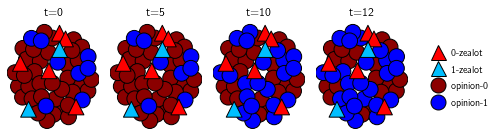

In [10]:
fs = 10 # fontsize
fig, ax = plt.subplots(1,4, figsize=(7,2))
plot_times = (0,5,10,12)
        
# create graph
G = nx.Graph()
for k in range(n):
    if k<z0 or k>=n-z1:
        G.add_node(k, s="^")
    else:
        G.add_node(k, s="o")
    for l in range(k):
        G.add_edge(l,k)

# get node pos and all distinct node classes according to the node shape attribute
pos = nx.layout.spring_layout(G, scale=1)
nodeShapes = set((aShape[1]["s"] for aShape in G.nodes(data=True)))

# look at different times
for i,t in enumerate(plot_times):
    n0t, n1t = n-N1t[t]-z0, N1t[t]-z1
    color = ["red"]*z0 + ["darkred"]*n0t + ["blue"]*n1t + ["deepskyblue"]*z1

    # draw nodes
    for aShape in nodeShapes:
        node_list = [sNode[0] for sNode in filter(lambda x: x[1]["s"]==aShape, G.nodes(data=True))]
        color_list = [color[k] for k in node_list]
        nx.draw_networkx_nodes(G, pos, ax=ax[i], node_size=250, node_color=color_list, node_shape=aShape, nodelist=node_list, edgecolors="black")
        ax[i].axis("off")
        ax[i].set_title("t={}".format(t))
        
    # draw edges if needed
    #nx.draw_networkx_edges(G, pos, ax=axis, width=.1)

# legend
legend_elements = list()
legend_elements += [Line2D([0], [0], marker="^", color="w", label="0-zealot", markerfacecolor="red", markeredgecolor="black", markersize=15)]
if z1>0:
    legend_elements += [Line2D([0], [0], marker="^", color="w", label="1-zealot", markerfacecolor="deepskyblue", markeredgecolor="black", markersize=15)]
legend_elements += [Line2D([0], [0], marker="o", color="w", label="opinion-0", markerfacecolor="darkred", markeredgecolor="black", markersize=15)]
legend_elements += [Line2D([0], [0], marker="o", color="w", label="opinion-1", markerfacecolor="blue", markeredgecolor="black", markersize=15)]
if z1>0:
    plt.legend(handles=legend_elements, edgecolor="w", labelspacing=.6, fontsize=fs, handletextpad=.25, borderpad=.2, loc=(1.2,0.18))
else:
    plt.legend(handles=legend_elements, edgecolor="w", labelspacing=.6, fontsize=fs, handletextpad=.25, borderpad=.2, loc=(1.2,0.27))

# show
plt.tight_layout()
plt.show()
plt.close()

## Figures 2 and 3